# Scatterplot

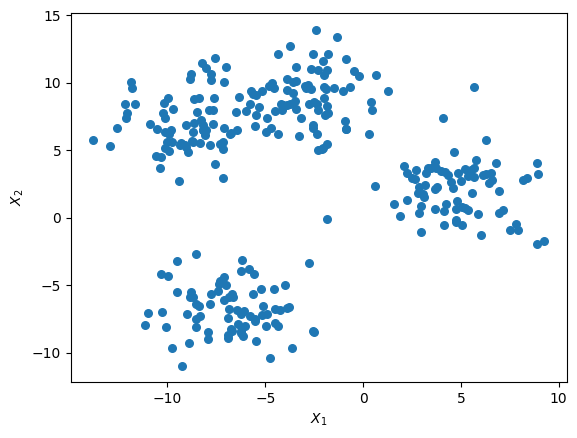

In [ ]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, n_features=2, cluster_std=2, random_state=42)

#plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=30)
plt.scatter(X[:, 0], X[:, 1],  s=30)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

# Linear regression fit with residuals

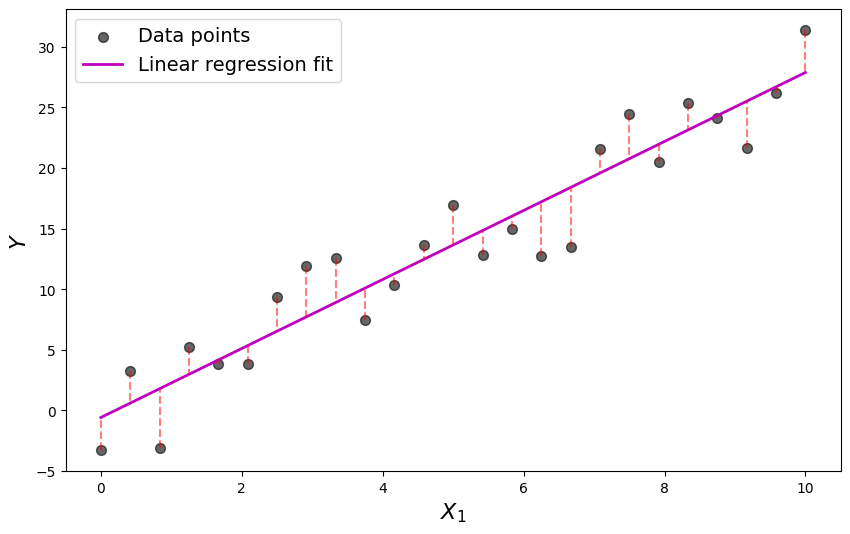

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
n_samples = 25
X_linear = np.linspace(0, 10, n_samples).reshape(-1, 1)

# Generate Y values with linear relationship plus noise
true_slope = 2.5
true_intercept = 1.0
noise = np.random.normal(0, 3.5, n_samples)
y_linear = true_intercept + true_slope * X_linear.ravel() + noise

# Select a subset of data points for clarity
n_points = n_samples
indices = np.random.choice(len(X_linear), n_points, replace=False)
X_subset = X_linear[indices]
y_subset = y_linear[indices]

# Use only X_1 as predictor for 1D linear regression visualization
X1_subset = X_subset[:, 0].reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X1_subset, y_subset)
y_pred = model.predict(X1_subset)

# Create scatter plot with regression line and residuals
plt.figure(figsize=(10, 6))
plt.scatter(X1_subset[:, 0], y_subset,c='black', s=50, alpha=0.6, label='Data points')

# Plot regression line
X_line = np.linspace(X1_subset[:, 0].min(), X1_subset[:, 0].max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, 'm-', linewidth=2, label='Linear regression fit')

# Plot residuals as dashed red lines
for i in range(len(X1_subset)):
    plt.plot([X1_subset[i, 0], X1_subset[i, 0]], [y_subset[i], y_pred[i]], 'r--', alpha=0.5)

plt.xlabel("$X_1$", fontsize=16)
plt.ylabel("$Y$", fontsize=16)
plt.legend(fontsize=14)
plt.show()

# Regression tree fit with residuals

Tree depth: 2, leaves: 4


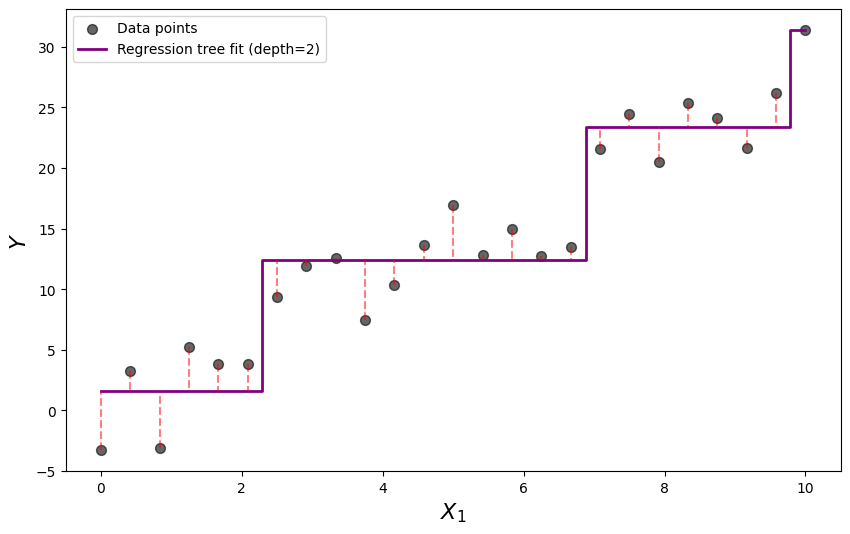

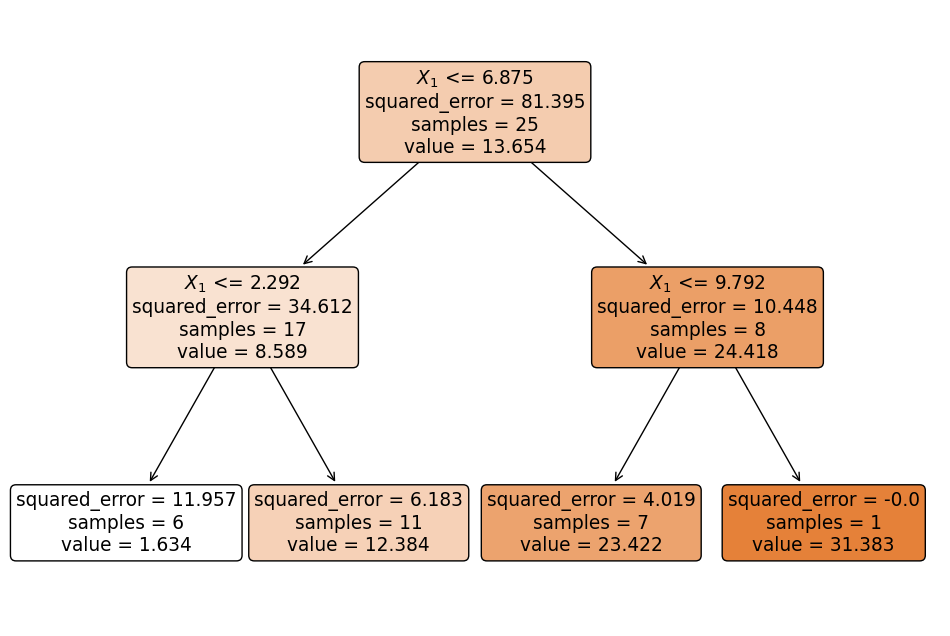

In [41]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np

mdepth = 2
plot_residuals = True

# Use only X_1 as predictor for 1D tree visualization
X1_subset = X_subset[:, 0].reshape(-1, 1)

# Fit regression tree with constrained depth
model = DecisionTreeRegressor(max_depth=mdepth, random_state=42)
model.fit(X1_subset, y_subset)
y_pred = model.predict(X1_subset)
print(f"Tree depth: {model.get_depth()}, leaves: {model.get_n_leaves()}")

# Create scatter plot with tree fit and residuals
plt.figure(figsize=(10, 6))
plt.scatter(X1_subset[:, 0], y_subset, c='black', s=50, alpha=0.6, label='Data points')

# Plot tree prediction as step function
X_line = np.linspace(X1_subset[:, 0].min(), X1_subset[:, 0].max(), 400).reshape(-1, 1)
y_line = model.predict(X_line)
plt.step(X_line[:, 0], y_line, where='mid', color='purple', linewidth=2,
          label=f'Regression tree fit (depth={mdepth})')

# Plot residuals as dashed red lines
if plot_residuals:
    for i in range(len(X1_subset)):
        plt.plot([X1_subset[i, 0], X1_subset[i, 0]], [y_subset[i], y_pred[i]], 'r--', alpha=0.5)

plt.xlabel("$X_1$", fontsize=16)
plt.ylabel("$Y$", fontsize=16)
plt.legend()
plt.show()

# plot the tree structure
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=["$X_1$"], filled=True, rounded=True)    
plt.show()

# OLS - MLE Equivalence

In [ ]:
"""
Illustration: univariate linear regression (OLS) and MLE equivalence

Creates a hand-drawn-style (but clean) matplotlib figure:
- scatter of (x_i, y_i)
- fitted regression line
- residuals (vertical dotted lines)
- Gaussian likelihood "bumps" rotated 90° (i.e., density along y at fixed x_i)
- text annotations: (1) minimize cost sum(e_i^2) and (2) maximize prob product p(y_i|x_i)

Run:
  python ols_mle_illustration.py
"""

import numpy as np
import matplotlib.pyplot as plt


def fit_ols(x: np.ndarray, y: np.ndarray) -> tuple[float, float]:
    """Return intercept b0 and slope b1 for simple OLS."""
    x = np.asarray(x)
    y = np.asarray(y)
    b1 = np.cov(x, y, bias=True)[0, 1] / np.var(x)
    b0 = y.mean() - b1 * x.mean()
    return b0, b1


def normal_pdf(z: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    """Normal density N(mu, sigma^2) evaluated at z."""
    z = np.asarray(z)
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((z - mu) / sigma) ** 2)


def main(seed: int = 7) -> None:
    rng = np.random.default_rng(seed)

    # --- synthetic data (univariate regression) ---
    n = 7
    x = np.linspace(1.0, 9.0, n)
    y_true = 1.2 + 0.55 * x
    y = y_true + rng.normal(0, 0.8, size=n)

    # --- OLS fit ---
    b0, b1 = fit_ols(x, y)
    yhat = b0 + b1 * x
    residuals = y - yhat

    # --- plotting canvas ---
    fig, ax = plt.subplots(figsize=(11, 6))

    # axes limits (pad around data)
    x_pad = 1.2
    y_pad = 1.6
    xmin, xmax = x.min() - x_pad, x.max() + x_pad
    ymin, ymax = min(y.min(), yhat.min()) - y_pad, max(y.max(), yhat.max()) + y_pad
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # scatter points
    ax.scatter(x, y, s=70, zorder=3)

    # regression line (purple)
    xx = np.linspace(xmin, xmax, 200)
    ax.plot(xx, b0 + b1 * xx, linewidth=4, zorder=2)

    # residuals (dotted red lines)
    for xi, yi, yhi in zip(x, y, yhat):
        ax.plot([xi, xi], [yhi, yi], linestyle=":", linewidth=2.5, zorder=2)

    # highlight one x_i with a vertical black line (like the sketch)
    hi = n // 2
    ax.axvline(x[hi], linewidth=3, zorder=1)
    ax.hlines(y[hi], xmin, x[hi], linestyles="--", linewidth=1.5, zorder=1)
    ax.hlines(yhat[hi], xmin, x[hi], linestyles="--", linewidth=1.5, zorder=1)

    # label the highlighted point components
    ax.text(xmin + 0.2, y[hi] + 0.05, r"$y_i$", fontsize=14, va="bottom")
    ax.text(xmin + 0.2, yhat[hi] - 0.05, r"$\hat{y}_i$", fontsize=14, va="top")
    ax.text(x[hi], ymin + 0.1, r"$x_i$", fontsize=14, ha="center", va="bottom")

    # --- Gaussian likelihood "bumps" rotated 90 degrees at each x_i ---
    # Model assumption (MLE view): Y|X=x ~ N(mu(x), sigma^2)
    sigma = np.sqrt(np.mean(residuals**2))  # RMSE as a simple sigma estimate

    # We draw density along y; then offset it horizontally around x_i.
    # Scale controls the width of the bump in x-units.
    bump_width = 0.9

    yy = np.linspace(ymin, ymax, 400)

    for xi, mui in zip(x, yhat):
        dens = normal_pdf(yy, mu=mui, sigma=sigma)
        dens = dens / dens.max()  # normalize for consistent display
        # "rotated": treat density as x-offset around xi, plotted as a curve in (x,y)
        ax.plot(xi + bump_width * dens, yy, linewidth=2.0, zorder=1)
        ax.plot(xi - bump_width * dens, yy, linewidth=2.0, zorder=1)
        # center line at the mean
        ax.plot([xi, xi], [mui - 0.9 * sigma, mui + 0.9 * sigma], linestyle="--", linewidth=1.4, zorder=1)

    # --- annotations for OLS vs MLE ---
    # (1) OLS objective
    ax.text(
        xmax - 5.0,
        ymax - 0.6,
        r"1) Minimize COST" "\n" r"$\sum_i e_i^2$",
        fontsize=16,
        ha="left",
        va="top",
    )

    # (2) MLE objective
    ax.text(
        xmax - 5.0,
        ymax - 2.5,
        r"2) Maximize PROB." "\n" r"$\prod_i p(y_i\mid x_i)$",
        fontsize=16,
        ha="left",
        va="top",
    )

    # optional title-like statement
    ax.text(
        xmin + 0.2,
        ymax - 0.2,
        r"OLS $\Longleftrightarrow$ MLE (Gaussian errors)",
        fontsize=16,
        ha="left",
        va="top",
    )

    # axis labels (as requested)
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Y", fontsize=16)

    # simplify spines for a clean “whiteboard” look
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.savefig("ols_mle_illustration.png", dpi=200)
    plt.show()
"""
Illustration: univariate linear regression with OLS residuals and MLE intuition

Requested styling:
- no text annotations (except axis labels X and Y)
- black data points
- purple regression line
- red dotted residuals (vertical)
- larger noise for more scatter
- one Gaussian “bump” per x_i, peak at (x_i, yhat_i) and pointing LEFT
- all bumps same color
- bumps correctly centered at mu_i = yhat_i

Run:
  python ols_mle_illustration.py

Output:
  ols_mle_illustration.png
"""

import numpy as np
import matplotlib.pyplot as plt


def fit_ols(x: np.ndarray, y: np.ndarray) -> tuple[float, float]:
    """Return intercept b0 and slope b1 for simple OLS."""
    x = np.asarray(x)
    y = np.asarray(y)
    b1 = np.cov(x, y, bias=True)[0, 1] / np.var(x)
    b0 = y.mean() - b1 * x.mean()
    return b0, b1


def normal_pdf(z: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    """Normal density N(mu, sigma^2) evaluated at z."""
    z = np.asarray(z)
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((z - mu) / sigma) ** 2)


def main(seed: int = 7) -> None:
    rng = np.random.default_rng(seed)

    # --- synthetic data (univariate regression) ---
    n = 8
    x = np.linspace(1.0, 9.0, n)

    # "true" line (not shown); we'll fit OLS to noisy observations
    b0_true, b1_true = 1.0, 0.6

    # Increase noise to improve readability (more scatter around the fitted line)
    noise_sigma = 1.6
    y = (b0_true + b1_true * x) + rng.normal(0, noise_sigma, size=n)

    # --- OLS fit (fitted regression line) ---
    b0, b1 = fit_ols(x, y)
    yhat = b0 + b1 * x

    # --- plotting canvas ---
    fig, ax = plt.subplots(figsize=(11, 6))

    # Axis limits with padding
    x_pad = 1.4
    y_pad = 2.0
    xmin, xmax = x.min() - x_pad, x.max() + x_pad
    ymin, ymax = min(y.min(), yhat.min()) - y_pad, max(y.max(), yhat.max()) + y_pad
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Scatter points (black)
    ax.scatter(x, y, s=70, color="black", zorder=3)

    # Regression line (purple)
    xx = np.linspace(xmin, xmax, 300)
    ax.plot(xx, b0 + b1 * xx, color="purple", linewidth=4, zorder=2)

    # Residuals (red dotted vertical lines from point to fitted line)
    for xi, yi, yhi in zip(x, y, yhat):
        ax.plot([xi, xi], [yhi, yi], color="red", linestyle=":", linewidth=2.5, zorder=2)

    # --- Gaussian likelihood bumps (one-sided, pointing LEFT) ---
    # In the MLE view for linear regression: Y|X=x_i ~ N(mu_i, sigma^2), mu_i = yhat_i.
    # We draw a vertical Gaussian over y, but represent its density as a horizontal offset
    # to the LEFT of x_i so the "peak points left" at y = mu_i.
    sigma_like = noise_sigma  # you can also set to RMSE if you prefer: np.sqrt(np.mean((y-yhat)**2))
    yy = np.linspace(ymin, ymax, 500)

    bump_width = 1.0  # horizontal extent in x-units (controls visual size)
    bump_color = "#1f77b4"  # single consistent color for all bumps (matplotlib default blue)

    for xi, mui in zip(x, yhat):
        dens = normal_pdf(yy, mu=mui, sigma=sigma_like)
        dens = dens / dens.max()  # normalize so peak is 1 at y=mui
        # One-sided bump: x(yy) = xi - bump_width * dens(yy)
        ax.plot(xi - bump_width * dens, yy, color=bump_color, linewidth=2.2, zorder=1)

    # Axis labels only
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Y", fontsize=16)

    # Clean "whiteboard" look
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.savefig("ols_mle_illustration.png", dpi=220)
    plt.show()


if __name__ == "__main__":
    main()

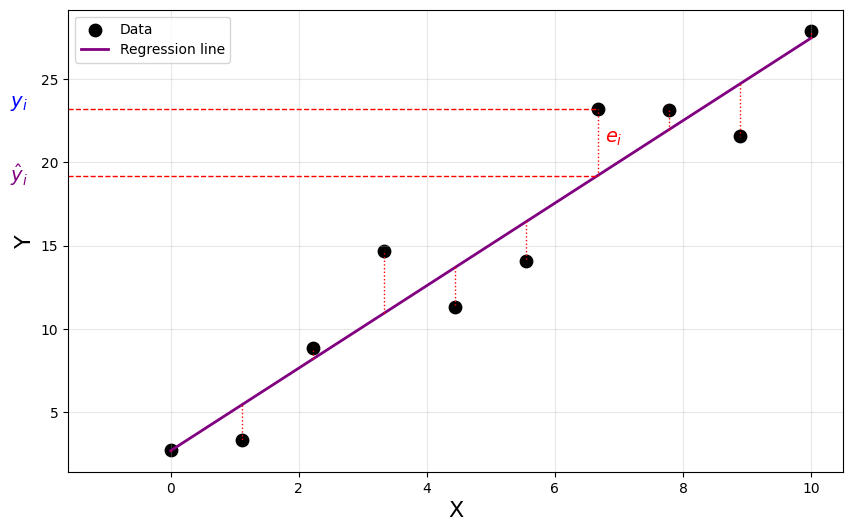

In [38]:
# Generate synthetic univariate data for linear regression
np.random.seed(42)
n_samples = 10

# Generate X values
X_linear = np.linspace(0, 10, n_samples).reshape(-1, 1)

# Generate Y values with linear relationship plus noise
true_slope = 2.5
true_intercept = 1.0
noise = np.random.normal(0, 3.5, n_samples)
y_linear = true_intercept + true_slope * X_linear.ravel() + noise

# Fit regression line
y_fit_coeffs = np.polyfit(X_linear.ravel(), y_linear, 1)
y_pred = np.polyval(y_fit_coeffs, X_linear.ravel())
residuals = y_linear - y_pred

# Point with largest absolute residual
largest_res_idx = np.argmax(np.abs(residuals))
x_max_res = X_linear.ravel()[largest_res_idx]
y_max_res = y_linear[largest_res_idx]
yhat_max_res = y_pred[largest_res_idx]

# Plot the synthetic data and regression line
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_linear, y_linear, c='black', s=80, label="Data")
ax.plot(X_linear, y_pred, color="purple", linewidth=2, label="Regression line")

# Add horizontal room on the left for annotations
x_min = X_linear.ravel().min()
x_max = X_linear.ravel().max()
left_pad = 1.6
right_pad = 0.5
ax.set_xlim(x_min - left_pad, x_max + right_pad)

# Plot residuals for all points (thin dotted red lines)
for x_val, y_val, y_hat in zip(X_linear.ravel(), y_linear, y_pred):
    ax.plot([x_val, x_val], [y_hat, y_val], color="red", linestyle=":", linewidth=1)

# Add two horizontal dashed red lines from left plot border to point with largest residual
x_left = ax.get_xlim()[0]
ax.plot([x_left, x_max_res], [y_max_res, y_max_res], color="red", linestyle="--", linewidth=1)
ax.plot([x_left, x_max_res], [yhat_max_res, yhat_max_res], color="red", linestyle="--", linewidth=1)

# Red annotations for y_i, y_hat_i and e_i
from matplotlib.transforms import blended_transform_factory

# Put y-axis label and y-level annotations at same horizontal location (outside plot)
ylabel_x = -0.075
ax.set_ylabel("Y", fontsize=16)
#ax.yaxis.set_label_coords(ylabel_x, 0.5)
text_transform = blended_transform_factory(ax.transAxes, ax.transData)
ax.text(ylabel_x, y_max_res + 0.15, r"$y_i$", color="blue", fontsize=14, ha="left", transform=text_transform, clip_on=False)
ax.text(ylabel_x, yhat_max_res - 0.35, r"$\hat{y}_i$", color="purple", fontsize=14, ha="left", transform=text_transform, clip_on=False)
ax.text(x_max_res + 0.12, (y_max_res + yhat_max_res) / 2, r"$e_i$", color="red", fontsize=14)

ax.set_xlabel("X", fontsize=16)
#ax.set_title("Synthetic Univariate Data for Linear Regression")
ax.legend()
ax.grid(alpha=0.3)
plt.show()

# Overfitting, Bias, Variance
## Overfitting illustration

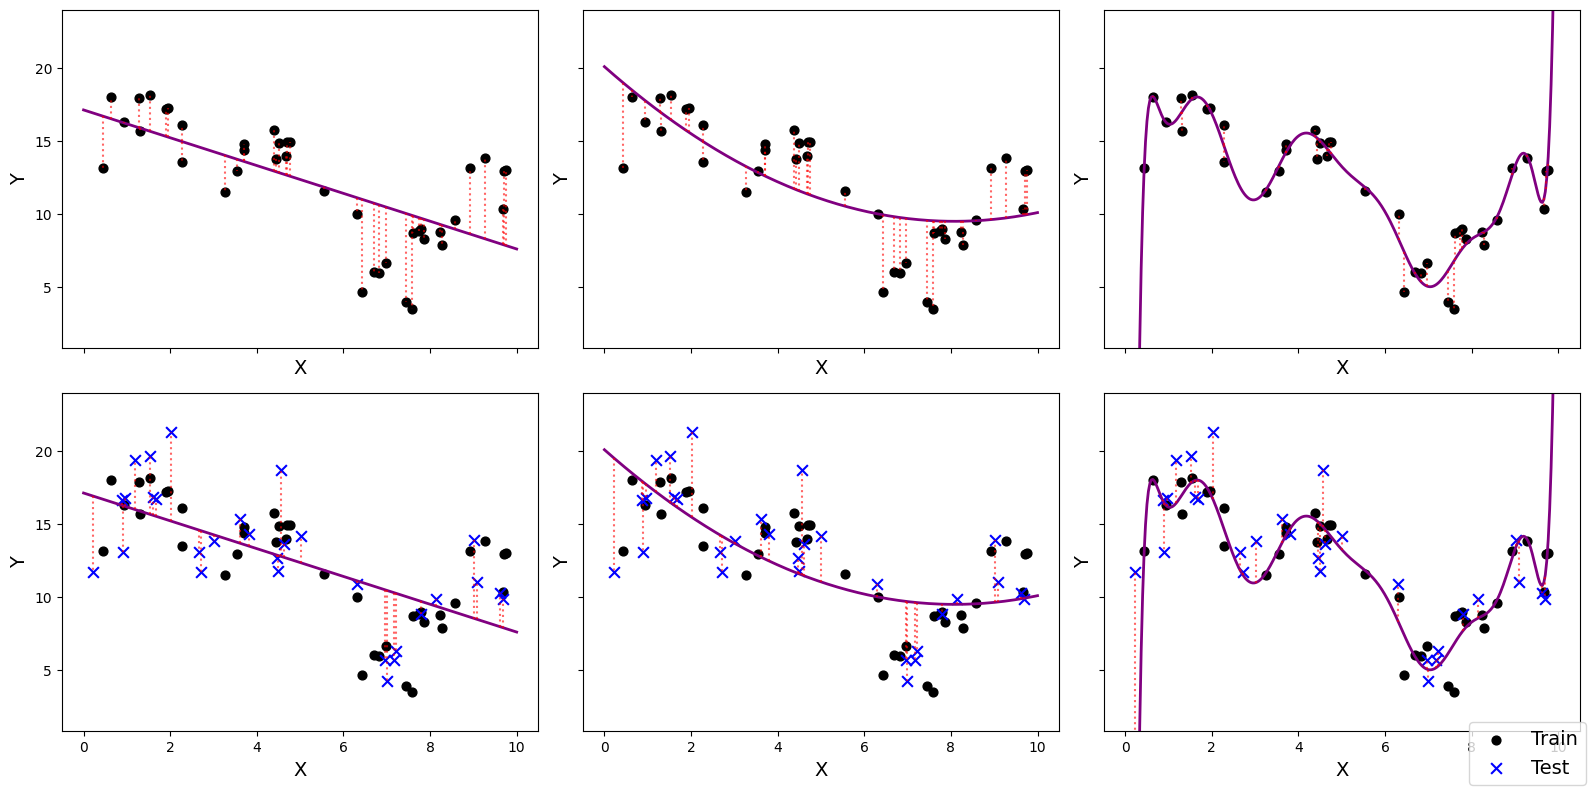

In [54]:
# Parameters
true_order = 8
noise_sigma = 2.0
n_train = 40
n_test = 30
plot_residuals = True
rng = np.random.default_rng(42)

# Non-monotone DGP (clear ups and downs over x in [0, 10])
def dgp(x):
    t = x / 10.0
    return (
        12
        + 4.0 * np.sin(2 * np.pi * t)
        + 2.2 * np.sin(5 * np.pi * t)
        + 0.8 * (t - 0.5)
    )

def sample_data(n):
    x = rng.uniform(0, 10, size=n)
    y = dgp(x) + rng.normal(0, noise_sigma, size=n)
    return x, y

x_train, y_train = sample_data(n_train)
x_test, y_test = sample_data(n_test)

x_grid = np.linspace(0, 10, 300)

def fit_poly(x, y, degree):
    p = np.polyfit(x, y, degree)
    return np.polyval(p, x_grid), p

models = [
    ("Linear (Underfit)", 1),
    ("Quadratic", 2),
    (f"Degree {2*true_order} (Overfit)", 2 * true_order),
]

# Explicit Y-limits based on generated data (train + test)
y_all = np.concatenate([y_train, y_test])
y_min = y_all.min()
y_max = y_all.max()
y_span = max(y_max - y_min, 1e-6)
y_pad = 0.15 * y_span
y_lower = y_min - y_pad
y_upper = y_max + y_pad

fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True, sharey=True)

for col, (title, deg) in enumerate(models):
    # Fit on training data
    y_fit_grid, p = fit_poly(x_train, y_train, deg)
    y_fit_train = np.polyval(p, x_train)
    y_fit_test = np.polyval(p, x_test)

    # Row 1: training only
    ax = axes[0, col]
    ax.scatter(x_train, y_train, c="black", s=40, label="Train")
    ax.plot(x_grid, y_fit_grid, color="purple", linewidth=2)
    if plot_residuals:
        for xi, yi, yhi in zip(x_train, y_train, y_fit_train):
            ax.plot([xi, xi], [yhi, yi], "r:", alpha=0.6)
    #ax.set_title(title)
    ax.set_xlabel("X", fontsize=14)
    ax.set_ylabel("Y", fontsize=14)
    ax.set_ylim(y_lower, y_upper)

    # Row 2: train + test, residuals for test only
    ax = axes[1, col]
    ax.scatter(x_train, y_train, c="black", s=40, marker="o", label="Train")
    ax.scatter(x_test, y_test, c="blue", s=60, marker="x", label="Test")
    ax.plot(x_grid, y_fit_grid, color="purple", linewidth=2)
    if plot_residuals:
        for xi, yi, yhi in zip(x_test, y_test, y_fit_test):
            ax.plot([xi, xi], [yhi, yi], "r:", alpha=0.6)
    ax.set_xlabel("X", fontsize=14)
    ax.set_ylabel("Y", fontsize=14)
    ax.set_ylim(y_lower, y_upper)

handles, labels = axes[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", fontsize=14)
plt.tight_layout()
plt.show()

## Bias illustration

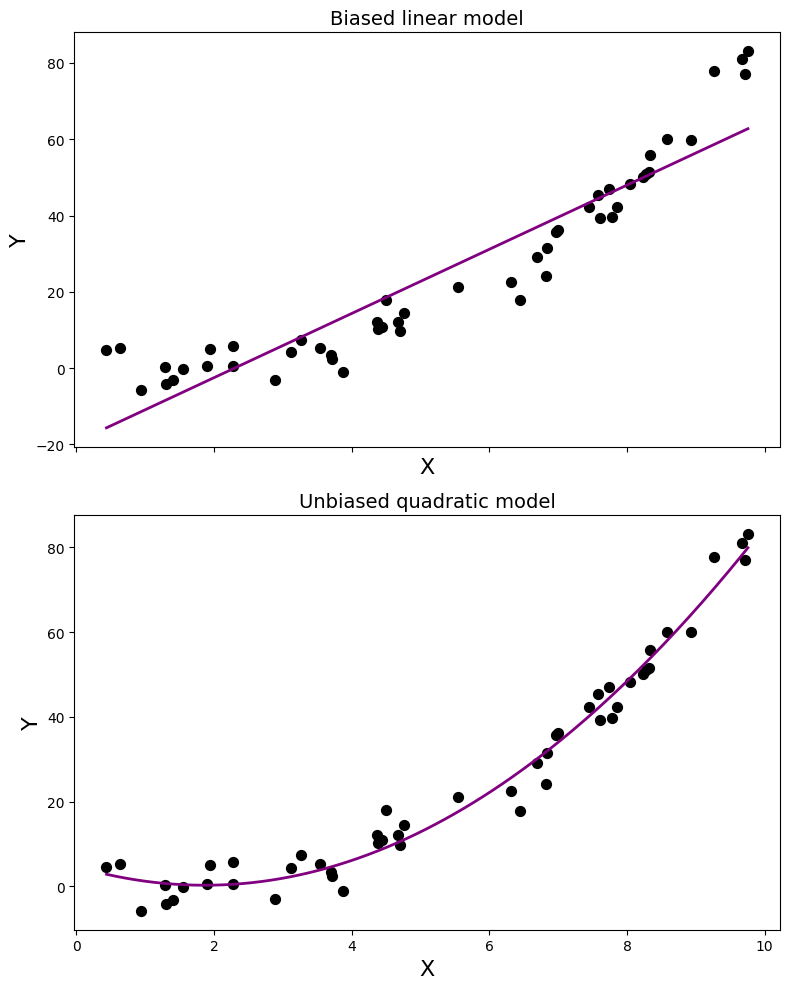

In [87]:
# Random seed for reproducibility
rng = np.random.default_rng(42)

# Sample data from a third-order polynomial with noise
def dgp(x):
    return 1.0 + 0.5 * x - 0.05 * x**2 + 0.09 * x**3

n_samples = 50
x = rng.uniform(0, 10, size=n_samples)
y = dgp(x) + rng.normal(0, 5, size=n_samples)

# Create a 2x1 subplot for linear vs quadratic fits
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Common x-grid for smooth fitted lines
x_line = np.linspace(x.min(), x.max(), 200)

# Top subplot: linear regression fit
coeffs_lin = np.polyfit(x, y, 1)
y_line_lin = np.polyval(coeffs_lin, x_line)
axes[0].scatter(x, y, c='black', s=50)
axes[0].plot(x_line, y_line_lin, color='purple', linewidth=2)
axes[0].set_ylabel("Y", fontsize=16)
axes[0].set_xlabel("X", fontsize=16)
axes[0].set_title("Biased linear model", fontsize=14)

# Bottom subplot: quadratic regression fit
coeffs_quad = np.polyfit(x, y, 2)
y_line_quad = np.polyval(coeffs_quad, x_line)
axes[1].scatter(x, y, c='black', s=50)
axes[1].plot(x_line, y_line_quad, color='purple', linewidth=2)
axes[1].set_xlabel("X", fontsize=16)
axes[1].set_ylabel("Y", fontsize=16)
axes[1].set_title("Unbiased quadratic model", fontsize=14)

plt.tight_layout()
plt.show()

## Variance Illustration

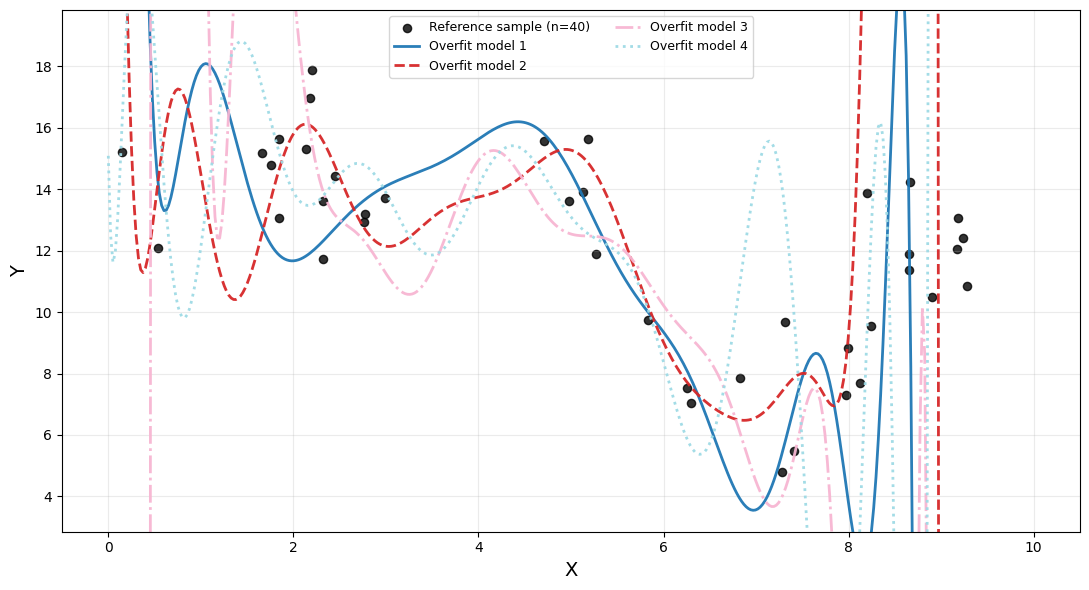

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Settings for improved variance illustration
n = 40
k = 250
k_sample = 4  # number of most distinct overfit lines to display
degree = 2 * true_order
rng_var = np.random.default_rng(123)

# Common x-grid for all fitted curves
x_grid_var = np.linspace(0, 10, 400)

# Reference sample shown as scatter
x_ref = rng_var.uniform(0, 10, size=n)
y_ref = dgp(x_ref) + rng_var.normal(0, noise_sigma, size=n)

# Fit k overfit models on k additional samples and store all predictions
all_fits = []
for _ in range(k):
    x_j = rng_var.uniform(0, 10, size=n)
    y_j = dgp(x_j) + rng_var.normal(0, noise_sigma, size=n)

    # Reuse fit_poly from previous cell
    x_grid = x_grid_var
    y_fit_j, _ = fit_poly(x_j, y_j, degree=degree)
    all_fits.append(y_fit_j)

all_fits = np.array(all_fits)  # shape: (k, len(x_grid_var))

# Select lines that are most different from the others
# Criterion: each line's nearest-neighbor distance (larger means more isolated/distinct)
diff = all_fits[:, None, :] - all_fits[None, :, :]
dists = np.sqrt(np.mean(diff**2, axis=2))
np.fill_diagonal(dists, np.inf)
nearest_neighbor_dist = dists.min(axis=1)

k_sample = min(k_sample, k)
selected_idx = np.argsort(nearest_neighbor_dist)[-k_sample:]

fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(x_ref, y_ref, color="black", s=35, alpha=0.8, label=f"Reference sample (n={n})")

line_styles = ["-", "--", "-.", ":"]
colors = plt.cm.tab20(np.linspace(0, 1, k_sample))

for rank, idx in enumerate(selected_idx):
    ax.plot(
        x_grid_var,
        all_fits[idx],
        color=colors[rank],
        linestyle=line_styles[rank % len(line_styles)],
        linewidth=2,
        alpha=0.95,
        label=f"Overfit model {rank + 1}"
    )

# Clip y-axis to sensible range based on plotted data points
y_pad = 0.15 * max(y_ref.max() - y_ref.min(), 1e-6)
ax.set_ylim(y_ref.min() - y_pad, y_ref.max() + y_pad)

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
#ax.set_title(
#    f"High Variance: {k_sample} Most Distinct Overfit Fits out of k={k}",
#    fontsize=14
#)
ax.legend(fontsize=9, ncol=2)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# Decision Tree: Impurity measures

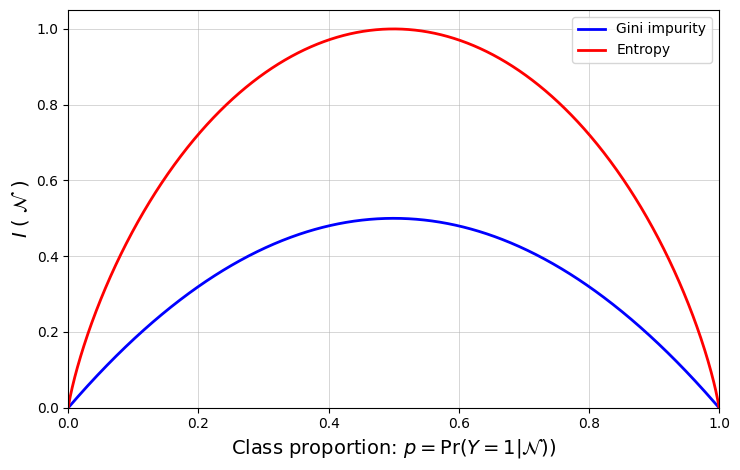

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Use Matplotlib mathtext (no external LaTeX installation required)
plt.rcParams["text.usetex"] = False


def gini_impurity(p: np.ndarray) -> np.ndarray:
    """
    Gini impurity for binary classification as a function of class-1 proportion p.
    G(p) = 2p(1-p) = 1 - p^2 - (1-p)^2
    """
    return 2.0 * p * (1.0 - p)

def entropy_impurity(p: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    """
    Shannon entropy (base 2) for binary classification as a function of class-1 proportion p.
    H(p) = -p log2 p - (1-p) log2 (1-p)
    Uses eps to avoid log(0).
    """
    p = np.clip(p, eps, 1.0 - eps)
    return -(p * np.log2(p) + (1.0 - p) * np.log2(1.0 - p))


p = np.linspace(0.0, 1.0, 1001)

g = gini_impurity(p)
h = entropy_impurity(p)

plt.figure(figsize=(7.5, 4.8))
# plt.plot(p, g, linewidth=2.0, label="Gini impurity  G(p)=2p(1-p)")
# plt.plot(p, h, linewidth=2.0, label="Entropy  H(p)=-p log2 p -(1-p) log2(1-p)")
plt.plot(p, g, linewidth=2.0, c='blue', label="Gini impurity")
plt.plot(p, h, linewidth=2.0, c='red', label="Entropy")

plt.xlabel(r"Class proportion: $p = \text{Pr}(Y=1|\mathcal{N})$)", fontsize=14)
plt.ylabel(r"$I \text{ } (\mathcal{ \text{ } N \text{ }})$", fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, max(h.max(), g.max()) * 1.05)
plt.grid(True, linewidth=0.6, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

$$ H(t) = - \sum_{i=1}^{K} p_{i\mid t}\,\log_2 p_{i\mid t} $$

$$ H(p_t) = -\,p_t \log_2 p_t \;-\; (1-p_t)\log_2(1-p_t)
$$

$$ G(t) = 1 - \sum_{i=1}^{K} p_{i\mid t}^2
$$